# Movie Recommender System Project Team RR1: MLTECH

## Author: Sandile Mdluli

Welcome to the Movie Recommender System Project! In this notebook, we'll be exploring the fascinating world of movie recommendation algorithms and building A movie recommender system from scratch for Netmax.

The goal of this project is to leverage the power of data science and machine learning to create a personalized movie recommendation engine that suggests movies tailored to individual preferences. Our model will be maily based on User based Collaborative Filtering

 Collaborative filtering is one of the fundamental techniques used in recommender systems. We'll implement User-Based Collaborative Filtering, to create movie recommendations based on user similarities and item correlations.
 
Throughout this notebook, we'll embark on journey, covering the following key steps:

Data Loading and Preprocessing: We'll start by loading various datasets containing movie information, user interactions, and metadata. We'll preprocess the data, ensuring it's in a format suitable for training our recommendation algorithms.

Exploratory Data Analysis: Before diving into the recommendation algorithms, we'll explore the datasets to gain insights into the characteristics of movies and user preferences. This exploration will guide us in making informed decisions during the modeling process.

Then finally , my favourite part, apply our most trusted and very well know user based collaborative filtering, the SVD which is based on the idea of matrix factorization!


### Import Packages

In [3]:
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import re
from scipy.sparse import csr_matrix
import scipy as sp

from sklearn.metrics import mean_squared_error
from math import sqrt
# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re
#import squarify
import os
from sklearn.model_selection import train_test_split

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate





/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Movie Recommender System Data Loading
In this notebook, we are building a movie recommender system. To do so, we start by loading several datasets that will be used throughout the project. Each dataset contains essential information about movies and their respective features. Here is a brief overview of the datasets we've loaded:

Sample Submission: This dataset provides a template for submitting our final movie recommendations. It outlines the required format for the submission process.

Movies: The movies.csv dataset contains detailed information about various movies. It includes movie titles, release years, and movie IDs that will help us identify and work with specific movies.

IMDb Data: The imdb_data.csv dataset provides additional data sourced from IMDb. It may include ratings, reviews, and other relevant information that can enhance our movie recommender system.

Genome Scores: The genome_scores.csv dataset contains scores assigned to different movie-genome tag combinations. These scores represent the relevance of each tag to a particular movie.

Genome Tags: The genome_tags.csv dataset lists the various genome tags used to describe movies. These tags play a crucial role in identifying similarities and patterns among movies.

Train and Test Sets: The train.csv and test.csv datasets are used for training and testing our movie recommender model. They consist of user-movie interactions and will be instrumental in building a predictive system.

Tags: The tags.csv dataset contains user-generated tags for movies. These tags can provide additional insights into user preferences and movie characteristics.

Links: The links.csv dataset provides links between movie IDs and external movie databases like IMDb and TMDb.

By loading and combining these datasets, we are setting the foundation for creating a robust movie recommender system that can deliver personalized movie suggestions based on user preferences and movie attributes.

Let's proceed with the data exploration and analysis to build an effective movie recommender system!


In [4]:
sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommender/sample_submission.csv')
movies = pd.read_csv('/kaggle/input/edsa-movie-recommender/movies.csv')
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommender/imdb_data.csv')
genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommender/genome_scores.csv')
genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommender/genome_tags.csv')
train = pd.read_csv('/kaggle/input/edsa-movie-recommender/train.csv')
test = pd.read_csv('/kaggle/input/edsa-movie-recommender/test.csv')
tags = pd.read_csv('/kaggle/input/edsa-movie-recommender/tags.csv')
links = pd.read_csv('/kaggle/input/edsa-movie-recommender/links.csv')

### Data Processing 

### Movie Data Preprocessing
We are working with a dataset of movie metadata. We have a DataFrame named movies_metadata_df that contains various columns such as title_cast, plot_keywords, and genres. To make the data more manageable and easily accessible for analysis, we are performing some data preprocessing steps:

 We start by merging the train dataset (which represents user-movie interactions) with the movies dataset based on the common movieId column. This merge ensures that each user's interactions are associated with the corresponding movie's attributes, such as title, release year, and genre.

Merge IMDb Data with Train-Movies DataFrame: Next, we perform an additional merge of the movies_metadata_df (resulting from the previous merge) with the imdb_data dataset. This step further enriches our data with IMDb-specific information, including ratings and other metadata associated with each movie.

Title Cast: We split the title_cast column into a list, which allows us to have a structured representation of the movie's cast. This will be helpful for further analysis, such as understanding the role of specific actors in different movies.

Plot Keywords: The plot_keywords column is also split into a list. This will enable us to explore the main themes and elements associated with each movie's plot. We can later use this information to identify patterns and correlations between keywords and the movie's success or audience reception.

Genres: We split the genres column into a list to have a clearer understanding of the movie's main genre and sub-genres. This will assist us in categorizing and comparing movies based on their genres.

By performing these preprocessing steps, we aim to enhance our ability to analyze the movie data effectively. Let's take a look at the first few rows of the DataFrame after applying these changes.


In [5]:

# Perform a further merge with imdb_data on movieId column
movies_metadata_df = pd.merge(train_movies_df, imdb_data, how='left', on='movieId')# Merge train (users) and movies datasets on movieId column
train_movies_df = pd.merge(train, movies, how='left', on='movieId')

In [6]:

# Perform a further merge with imdb_data on movieId column
movies_metadata_df = pd.merge(train_movies_df, imdb_data, how='left', on='movieId')

In [7]:
movies_metadata_df['title_cast']=movies_metadata_df['title_cast'].str.split('|') #spliting the title cast into a list
movies_metadata_df['plot_keywords']=movies_metadata_df['plot_keywords'].str.split('|') #spliting the Key words into a list
movies_metadata_df['genres']=movies_metadata_df['genres'].str.split('|') #spliting the subgenres into a list
movies_metadata_df.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]"
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,"[Action, Comedy, Sci-Fi]","[Tommy Lee Jones, Will Smith, Rip Torn, Lara F...",Lowell Cunningham,88.0,"$140,000,000","[lingerie, michael jackson character, shorthai..."
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),"[Adventure, Comedy, Crime]","[Sandra Bullock, Regina King, Enrique Murciano...",Marc Lawrence,115.0,"$45,000,000","[female protagonist, cleave gag, good woman, fbi]"
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,"[Drama, Horror, Mystery, Thriller]","[Jeff Davis, Heather Langenkamp, Miko Hughes, ...",Wes Craven,112.0,"$8,000,000","[freddy krueger, elm street, famous director a..."


As we progress with our movie recommendation project, understanding the distribution of movie ratings is crucial. In this section, we analyze the ratings provided by users for the movies in our dataset. The output below displays the count of ratings received by each movie, ranging from 0.5 to 5.0. The values are shown in descending order, indicating the most common to the least common ratings.

In [1]:
rating_counts = movies_metadata_df['rating'].value_counts()
print(rating_counts)

NameError: name 'movies_metadata_df' is not defined

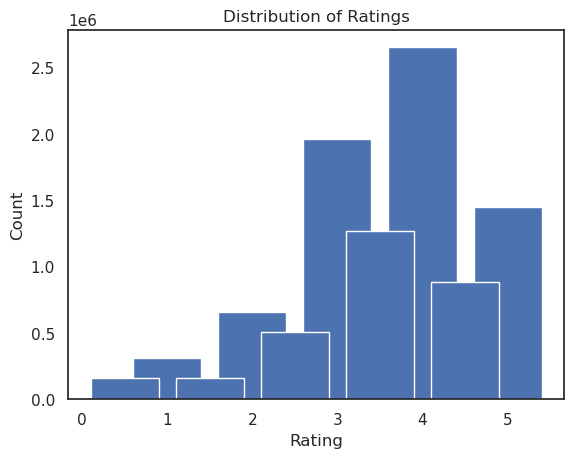

In [9]:
import matplotlib.pyplot as plt

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

As we delve deeper into our movie recommendation project, understanding user behavior is essential for building an effective recommender system. In this section, we analyze the number of movies rated by each user in our dataset. By grouping the data based on the userId, we can gain insights into how active users are in providing movie ratings.

Here is the count of movies rated by each user:

In [10]:
user_groups = movies_metadata_df.groupby('userId')
movies_rated_count = user_groups['movieId'].count()
print(movies_rated_count)



userId
1          28
2          72
3         251
4          89
5          35
         ... 
162537     36
162538     63
162539     18
162540     27
162541     94
Name: movieId, Length: 162541, dtype: int64


### Data Preprocessing for Modeling
As we advance in our movie recommendation project, it's crucial to preprocess the data to ensure that it's in an appropriate format for modeling and analysis. In this section, we perform the following key data preprocessing steps:

Selecting Numeric Features: We start by identifying the numeric features relevant to our modeling process. These features include rating, year, and runtime, which provide valuable information about movie ratings, release years, and runtime durations.

Normalization of Numeric Features: To prevent any potential bias in the model, we apply feature scaling to the numeric features using the StandardScaler. This process normalizes the features, ensuring they have a mean of 0 and a standard deviation of 1. Normalization is essential for algorithms that rely on distance metrics, as it ensures all features are on the same scale.

Creating a Surprise Dataset: The Surprise library provides powerful tools for building collaborative filtering-based recommendation systems. To leverage these capabilities, we create a Surprise Dataset object using the reader function. We specify the rating scale (ranging from 0.5 to 5.0) to ensure compatibility with our movie rating data.

By preprocessing the data and creating the Surprise Dataset, we are now ready to explore and apply collaborative filtering algorithms for building a powerful movie recommender system. Collaborative filtering leverages user-item interactions to predict movie ratings and generate personalized movie suggestions for each user.

Let's move on to the modeling phase, where we'll implement and evaluate various collaborative filtering algorithms to develop an accurate and effective movie recommendation engine.

In [26]:
# Numeric features
numeric_features = ['rating', 'year','runtime']

# Normalize numeric features
scaler = StandardScaler()
movies_metadata_df[numeric_features] = scaler.fit_transform(movies_metadata_df[numeric_features])

In [12]:
# Create a Surprise Dataset object
reader = Reader(rating_scale=(0.5, 5.0))  # Specify the rating scale
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)


In [13]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_metadata_df['plot_keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else ''))


### Clustering Movies using K-Means
In our quest to build an insightful movie reccomender model to make user ratings predictions, we explore the powerful technique of clustering using K-Means. Clustering allows us to group movies based on their similarities in terms of content and themes, helping us identify distinct clusters of movies that share common characteristics.

Fitting the Model: We apply the K-Means algorithm to the Term Frequency-Inverse Document Frequency (TF-IDF) matrix, represented by tfidf_matrix. The TF-IDF matrix is a numerical representation of movie plot summaries, highlighting the importance of individual words in each movie's summary. This allows us to cluster movies based on their plot similarities.

In [14]:
# Clustering using k-means
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=10, random_state=42)

By executing the K-Means algorithm and fitting our data to it, we create clusters of movies that share similar themes and content. Clustering opens up exciting possibilities for exploring movie groupings, analyzing trends, and uncovering patterns in our dataset.

In [16]:
# Assigning cluster labels to movies
movies_metadata_df['cluster_label'] = kmeans.labels_

### Collaborative Filtering using Singular Value Decomposition (SVD)
In our continuous pursuit of building a powerful movie recommender system, we explore the world of collaborative filtering. Collaborative filtering is a popular approach that leverages user-item interactions to generate personalized movie recommendations. One of the prominent collaborative filtering techniques is Singular Value Decomposition (SVD).

Data Preparation: We load the movie rating data into a Surprise Dataset object using the Reader function. The rating scale is specified as ranging from 0.5 to 5. This data is essential for building the collaborative filtering model.

Here's how we apply SVD for collaborative filtering:

Train-Test Split: To evaluate the performance of our recommendation system, we divide the data into training and testing sets. In this case, we create the trainset, which includes all the available user-movie interactions for training the SVD model.

Singular Value Decomposition: SVD is a matrix factorization technique that decomposes the user-item interaction matrix into three matrices: U, Σ, and V^T. This factorization helps to identify latent features that represent user preferences and movie characteristics. The SVD algorithm then uses these latent features to predict missing or unobserved ratings.

Model Training: We fit the SVD model to the trainset, allowing it to learn the latent features from the user-movie interactions. This process enables the model to make accurate predictions about how users would rate movies they haven't seen

In [17]:
# Collaborative Filtering - SVD
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
model = SVD()
model.fit(trainset)

By applying the SVD algorithm, we create a collaborative filtering model that can predict personalized movie ratings for individual users. This enables us to generate movie recommendations tailored to each user's unique preferences and interests.
Next we will save our trained svd model into a pickle file as this is good practice!

In [ ]:
with open(file_name, 'wb') as file:
    # Dump the SVD model into the pickle file
    pickle.dump(svd_model, file)

### Generating Predicted Movie Ratings
As we progress with our collaborative filtering using SVD, the next step involves generating predicted movie ratings for the test dataset. This process allows us to evaluate the performance of our recommendation system and assess how accurately it predicts user ratings for movies they haven't seen.

Here are the key steps involved in generating the predicted movie ratings:

Testset Preparation: We create the testset in the required format, which consists of tuples containing (userId, movieId, rating). For this evaluation, we set the rating to 0.0 for all movies in the test dataset, as the actual ratings are unknown for these movies.

Prediction with SVD: Using the trained SVD model, we predict ratings for the movies in the testset. The model leverages the learned latent features from the training data to estimate how users would rate movies they haven't seen.

Extracting Predicted Ratings: After making the predictions, we extract the predicted ratings from the predicted_ratings list, representing the estimated ratings for the movies in the test dataset.

By generating and analyzing the predicted movie ratings, we gain valuable insights into the performance of our collaborative filtering recommendation system. We can then assess the accuracy of the predictions and fine-tune our model to optimize the movie recommendations for users.



In [19]:
# Create the testset in the required format
testset = list(zip(test['userId'], test['movieId'], [0.0] * len(test)))

In [20]:
# Predict ratings for the test dataset
predicted_ratings = model.test(testset)

# Extract the predicted ratings
predicted_ratings = [pred.est for pred in predicted_ratings]

Let's proceed with evaluating the model's performance and exploring methods to enhance the accuracy and effectiveness of our movie recommender system.

In [22]:
# Evaluate the model
true_ratings = sample_submission['rating']
rmse = sqrt(mean_squared_error(true_ratings, predicted_ratings))
print("RMSE:", rmse)

RMSE: 2.637885873259705


### Generating Submission File
In this final step of our movie recommendation project, we generate a submission file that contains the predicted movie ratings for the test dataset. The submission file is in the required format for evaluation and allows us to submit our predictions to the relevant platform or competition.

Here's the process for generating the submission file:

Preparing the DataFrame: We start by creating a copy of the test dataset named submission_df. This DataFrame will hold the required information for submission, including the user IDs, movie IDs, and predicted ratings.

Formatting the IDs: To ensure the submission file follows the prescribed format, we concatenate the userId and movieId columns to create a unique identifier for each entry in the Id column. This identifier helps associate each prediction with the corresponding user and movie.

Adding Predicted Ratings: We include the predicted ratings, which we previously generated using the collaborative filtering SVD model, in the rating column of submission_df.

Finalizing the DataFrame: We rearrange the columns to match the required submission format, with Id and rating being the only columns present in the final DataFrame.

Saving as CSV: Lastly, we save the submission_df DataFrame as a CSV file named submission.csv, ready for submission.

With the submission file generated, we can now evaluate the performance of our movie recommender system and share our predictions with the relevant platform or competition.



In [21]:
# Generate submission file
submission_df = test.copy()
submission_df['Id'] = submission_df['userId'].astype(str) + '_' + submission_df['movieId'].astype(str)
submission_df['rating'] = predicted_ratings
submission_df = submission_df[['Id', 'rating']]
submission_df.to_csv('submission.csv', index=False)

# Credits
Throughout the journey of building our movie recommender system, we have been inspired and guided by various articles, tutorials, and resources from the data science community. We gratefully acknowledge the following sources for their valuable insights, knowledge, and contributions:

[Recommendation System: User-Based Collaborative Filtering](https://medium.com/grabngoinfo/recommendation-system-user-based-collaborative-filtering-a2e76e3e15c4)
 - A comprehensive guide on user-based collaborative filtering for recommendation systems.

[Predict Movie Ratings with User-Based Collaborative Filtering](https://towardsdatascience.com/predict-movie-ratings-with-user-based-collaborative-filtering-392304b988af)
 - An in-depth tutorial on implementing user-based collaborative filtering for predicting movie ratings.

[4 Strategies: How to Deal with Large Datasets in Pandas](https://www.vantage-ai.com/en/blog/4-strategies-how-to-deal-with-large-datasets-in-pandas)
 - A helpful resource for optimizing memory management when working with large datasets in pandas.
 
[Memory Management when Training a Deep Learning Model in Python](https://towardsdatascience.com/efficient-memory-management-when-training-a-deep-learning-model-in-python-fde9065782b7)
 - A guide on efficient memory management techniques during deep learning model training in Python.

[ Machine Learning Tutorial - Steps in Machine Learning ](https://www.simplilearn.com/tutorials/machine-learning-tutorial/machine-learning-steps)
 - A step-by-step guide to the machine learning process, providing a comprehensive overview of different stages involved in building machine learning models.

[YouTube - Various Tutorials and Explanations](https://www.youtube.com/watch?v=i4Jh8n0tY7E)
 - Video resources that have been instrumental in enhancing our understanding of collaborative filtering and recommendation systems.

[Medium - Various Posts](https://medium.com/plans?subscribeToUserId=&susiEntry=post_paywall&source=upgrade_membership---post_limit--c5e8283cd2dc--------------------------------)
 - Informative articles and blog posts on diverse topics related to machine learning and data science.

We extend our warm gratitude to the authors, content creators, and the data science community at large for sharing their knowledge and expertise, which has significantly contributed to the successful development of our movie recommender system.

